In [1]:
# Import necessary packages to reproduce the example
import neuralsens.partial_derivatives as ns
from neuralsens.daily_demand_tr import load_daily_data_demand_tr
import pandas as pd
from sklearn.neural_network import MLPRegressor

In [2]:
# Read training data
daily_demand_tr = load_daily_data_demand_tr()
X_train = daily_demand_tr[["WD","TEMP"]]
X_train.iloc[:, 1] = X_train.iloc[:, 1] / 10
y_train = daily_demand_tr["DEM"] / 100

C:\Users\jaime\AppData\Local\Temp\ipykernel_6164\3678489195.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.iloc[:, 1] = X_train.iloc[:, 1] / 10


In [3]:
### Create MLP model
model = MLPRegressor(solver='sgd', # Update function
                    hidden_layer_sizes=[40], # #neurons in hidden layers
                    learning_rate_init=0.1, # initial learning rate
                    activation='logistic', # Logistic sigmoid activation function
                    alpha=0.005, # L2 regularization term
                    learning_rate='adaptive', # Type of learning rate used in training
                    max_iter=500, # Maximum number of iterations
                    batch_size=10, # Size of batch when training
                    random_state=150)

# Train model
model.fit(X_train, y_train)

MLPRegressor(activation='logistic', alpha=0.005, batch_size=10,
             hidden_layer_sizes=[40], learning_rate='adaptive',
             learning_rate_init=0.1, max_iter=500, random_state=150,
             solver='sgd')

In [4]:
# Obtain parameters to perform jacobian
wts = model.coefs_
bias = model.intercepts_
actfunc = ['identity',model.get_params()['activation'],model.out_activation_]
X = pd.DataFrame(X_train, columns=["WD","TEMP"])
y = pd.DataFrame(y_train, columns=["DEM"])
sens_end_layer = 'last'
sens_end_input = False
sens_origin_layer = 0
sens_origin_input = True

In [5]:
jacobian = ns.jacobian_mlp(wts, bias, actfunc, X, y)

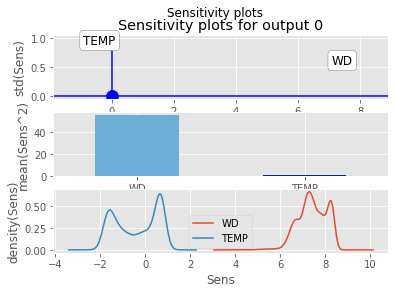

In [6]:
jacobian.plot("sens")